In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load dataframe

Para esta primeira analise, coletamos os dados em uma das fontes mais conhecidas no mundo dos Cientistas de Dados, o Kaggle. Esse site começou como uma plataforma onde empresas e pesquisadores publicavam datasets e os usuários competiam entre si para criar os melhores modelos preditivos. Em março de 2017 foi comprado pelo Google. Hoje em dia é um portal repleto de conteúdo e é referência na área de Data Science.

Para nossa tarefa de EDA decidi trabalhar com a base de dados do FIFA 2018, um dos jogos de video-game mais famosos do mundo. Essa base possui dados de todos os jogadores do game bem como alguns atributos. Sem mais delongas, vamos codar!

In [2]:
df = pd.read_csv('dados_fifa.csv')

### Existem quantos clubs distintos neste DataFrame 

In [3]:
df.club.nunique()

647

### Existem quantos jogadores distintos neste DataFrame

In [4]:
df.nome.nunique()

16975

### Quais jogadores recebem o maior salario

In [5]:
df.groupby(['nome'])['salario'].max().sort_values(ascending=False)

nome
Cristiano Ronaldo    565.0
L. Messi             565.0
L. Suárez            510.0
G. Bale              370.0
R. Lewandowski       355.0
T. Kroos             340.0
L. Modrić            340.0
S. Agüero            325.0
Sergio Ramos         310.0
E. Hazard            295.0
K. Benzema           295.0
K. De Bruyne         285.0
Neymar               280.0
G. Higuaín           275.0
I. Rakitić           275.0
A. Sánchez           265.0
M. Özil              265.0
Iniesta              260.0
J. Rodríguez         250.0
Isco                 250.0
Marcelo              250.0
Sergio Busquets      250.0
Z. Ibrahimović       240.0
Piqué                240.0
Diego Costa          235.0
M. Neuer             230.0
Thiago               225.0
A. Robben            225.0
G. Chiellini         225.0
David Silva          220.0
                     ...  
H. Narzary             0.0
E. Conde               0.0
A. Fathi               0.0
Renato Augusto         0.0
Ren Hang               0.0
E. Paredes             

### Quais jogadores possuem a maior precisao_chute_livre

In [6]:
df.groupby(['nome'])['precisao_chute_livre'].max().sort_values(ascending=False)

nome
A. Gomes            96.0
D. Mitchell         94.0
A. Pirlo            93.0
H. Çalhanoğlu       93.0
D. Payet            91.0
M. Pjanić           91.0
M. Álvarez          91.0
L. Messi            90.0
Parejo              90.0
J. Yueill           89.0
G. Sigurðsson       89.0
S. Giovinco         89.0
M. Depay            88.0
S. Nakamura         88.0
C. Eriksen          87.0
J. Reimerink        87.0
S. Salihović        87.0
S. İnan             87.0
Anderson Talisca    87.0
M. Ekici            87.0
Élton               86.0
L. Schøne           86.0
J. Rodríguez        86.0
K. Honda            86.0
Y. Touré            86.0
Y. Endo             86.0
W. Sneijder         86.0
R. Elm              85.0
D. Alaba            85.0
Willian             85.0
                    ... 
M. Köbbing           9.0
Lee Bum Young        9.0
S. Bruzzese          9.0
O. Christensen       9.0
E. Dahlin            9.0
E. McGinty           9.0
N. Penneteau         9.0
V. Demarconnay       8.0
K. Kunz             

### 80% dos jogadores estao abaixo de qual idade

In [7]:
df.idade.describe(percentiles=[0.8])

count    17981.000000
mean        25.144541
std          4.614272
min         16.000000
50%         25.000000
80%         29.000000
max         47.000000
Name: idade, dtype: float64

### Qual Club possui maior media salarial

In [8]:
df.groupby(['club'])['salario'].mean().sort_values(ascending=False)

club
FC Barcelona               191.680000
Real Madrid CF             182.730769
FC Bayern Munich           125.884615
Juventus                   121.730769
Manchester United          107.441176
Chelsea                    107.181818
Manchester City             95.515152
Arsenal                     91.121212
Liverpool                   83.250000
Paris Saint-Germain         78.500000
Everton                     75.727273
Tottenham Hotspur           68.093750
Milan                       62.551724
Napoli                      62.461538
West Ham United             60.468750
Roma                        59.925926
Inter                       53.440000
Southampton                 51.181818
Borussia Dortmund           50.147059
Atlético Madrid             49.406250
Fenerbahçe SK               49.035714
Zenit St. Petersburg        45.433333
Leicester City              44.468750
Galatasaray SK              43.931034
West Bromwich Albion        43.172414
Swansea City                43.031250
Stoke C

### Qual Club possui a menor media de idade

In [9]:
df.groupby(['club'])['idade'].mean().sort_values()

club
Sevilla Atlético                     19.793103
FC Barcelona B                       20.379310
Werder Bremen II                     21.400000
LOSC Lille                           21.629630
Crewe Alexandra                      21.884615
FC Nordsjælland                      22.000000
Galway United                        22.040000
Ajax                                 22.068966
Barnsley                             22.100000
PSV                                  22.115385
Walsall                              22.142857
Stabæk Fotball                       22.148148
Envigado FC                          22.214286
KRC Genk                             22.275862
Olympique Lyonnais                   22.323529
NAC Breda                            22.366667
Halmstads BK                         22.476190
Brentford                            22.500000
RB Leipzig                           22.531250
FK Haugesund                         22.541667
Accrington Stanley                   22.541667
Empoli  

### Quais sao as medias de salario por idade

In [10]:
df.groupby(['idade'])['salario'].mean().sort_values(ascending=False)

idade
30    18.838308
31    16.874814
28    16.672693
27    16.045139
29    15.601249
32    15.515810
26    15.435940
25    13.065046
34    13.000000
33    12.871961
24    11.506747
23    10.761119
35     9.591623
39     9.550000
40     9.250000
22     8.878399
36     8.463235
44     8.000000
37     7.695652
21     7.503110
20     6.338956
38     5.805556
19     3.567820
18     2.729167
17     2.174419
41     2.000000
16     1.846154
43     1.000000
47     1.000000
Name: salario, dtype: float64

### Quais dos atributos dos jogadores possui a maior variancia

In [11]:
list_var = ['idade',  'avaliacao_geral', 'potencial', 'salario', 'aceleracao',
            'agressividade', 'agilidade', 'equilibrio', 'controle_bola', 'cruzamento', 'curva', 'drible',
            'finalizacao', 'precisao_chute_livre']
for i in list_var:
    print(i, df[i].var())

idade 21.291509273878823
avaliacao_geral 48.83165958950985
potencial 37.23683660895548
salario 532.6864063964687
aceleracao 222.51602890803227
agressividade 305.5789445341483
agilidade 218.87066308838294
equilibrio 198.7576627510475
controle_bola 282.2705475294989
cruzamento 341.14901788248983
curva 341.38409719838376
drible 360.7652696434792
finalizacao 379.5314541446202
precisao_chute_livre 309.7311486806708


### Qual eh o desvio-padrao da variavel salario

In [12]:
df.salario.std()

23.080000138571677

### Qual a mediana do salario

In [13]:
df.salario.median()

4.0

### Qual eh a maior correlacao entre os atributos e salario

In [14]:
df[['salario', 'idade']].corr()['idade'][0]

0.15000570798235358

In [15]:
list_var = ['idade',  'avaliacao_geral', 'potencial','aceleracao','agressividade', 
            'agilidade', 'equilibrio', 'controle_bola', 'cruzamento', 'curva', 'drible',
            'finalizacao', 'precisao_chute_livre']

In [16]:
for i in list_var:
    print(i, round(df[['salario', i]].corr()[i][0],3))
    

idade 0.15
avaliacao_geral 0.594
potencial 0.519
aceleracao 0.147
agressividade 0.207
agilidade 0.174
equilibrio 0.086
controle_bola 0.294
cruzamento 0.243
curva 0.268
drible 0.25
finalizacao 0.234
precisao_chute_livre 0.247


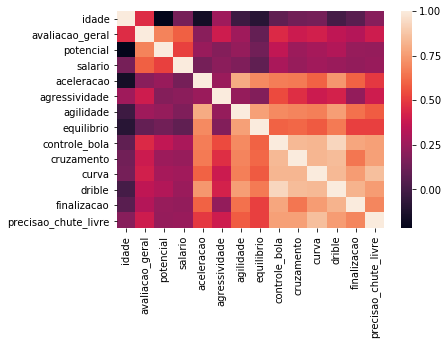

In [22]:
sns.heatmap(df.corr())

### Faca um histograma para cada atributo numerico dos jogadores, qual atributo possui distribuicao mais proxima da distribuicao Normal

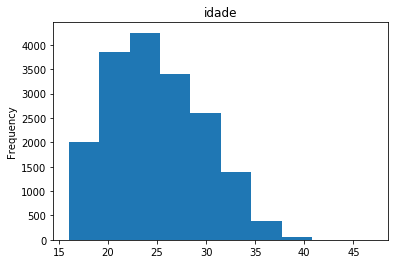

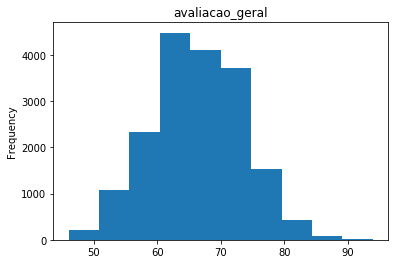

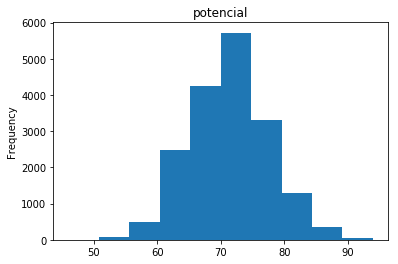

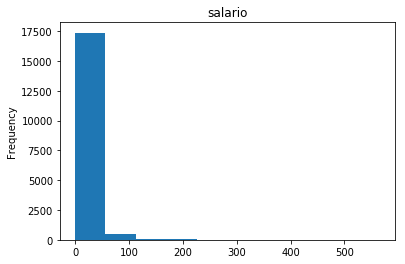

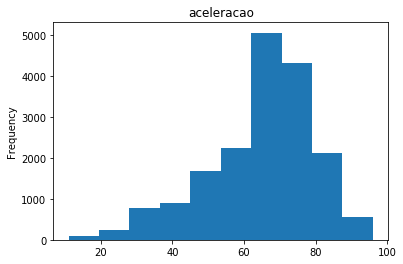

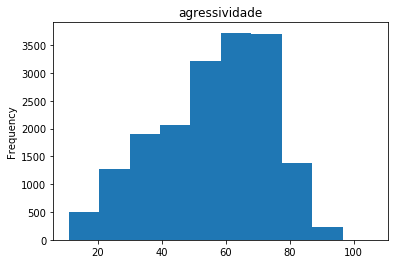

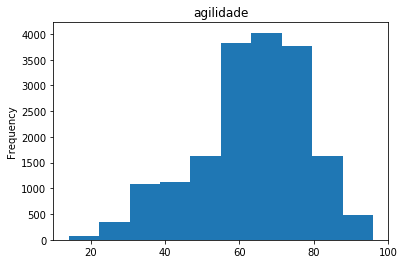

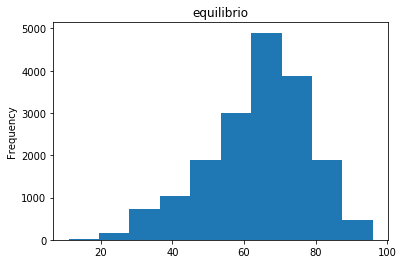

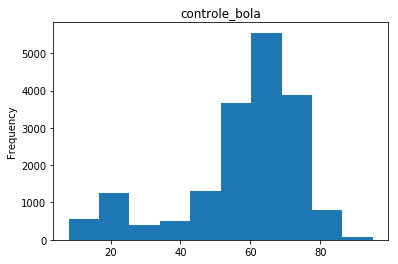

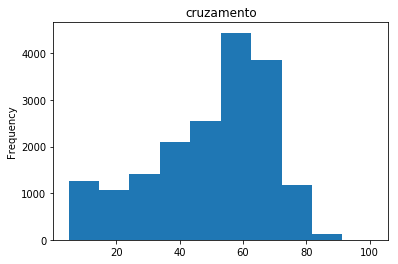

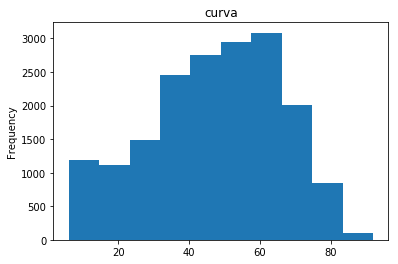

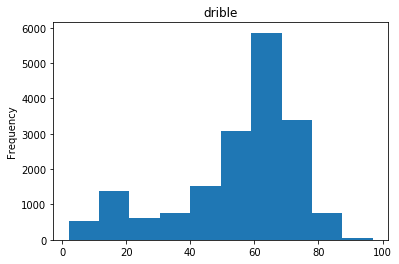

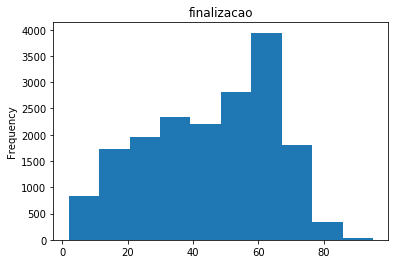

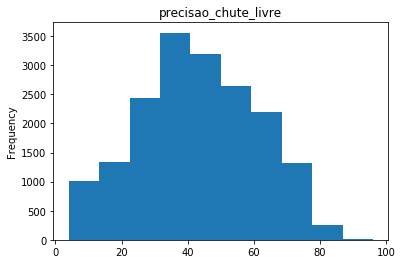

In [63]:
list_var = ['idade',  'avaliacao_geral', 'potencial', 'salario', 'aceleracao',
            'agressividade', 'agilidade', 'equilibrio', 'controle_bola', 'cruzamento', 'curva', 'drible',
            'finalizacao', 'precisao_chute_livre']
for i in list_var:
    
    df[i].plot(kind='hist', title=i)
    plt.show()

### Analise de variancia

#### Existe diferenca significativa entre os salarios do Brasil, Chile e Argentina

In [31]:
f, p = stats.f_oneway(df[df['nacionalidade'] == 'Brazil'].salario,
                      df[df['nacionalidade'] == 'Chile'].salario,
                      df[df['nacionalidade'] == 'Argentina'].salario)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 23.330291237946973
P value: 9.467065043116943e-11 



#### Quais dentre esses tres paises se diferenciam entre si

In [32]:
from statsmodels.stats.multicomp import MultiComparison

In [33]:
df_tukey = df[df['nacionalidade'].isin(['Brazil', 'Chile', 'Argentina'])]

In [34]:
mc = MultiComparison(df_tukey['salario'], df_tukey['nacionalidade'])
result = mc.tukeyhsd()

In [35]:
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1  group2 meandiff  lower    upper  reject
-------------------------------------------------
Argentina Brazil  5.9841   3.0189   8.9493  True 
Argentina Chile  -4.6963  -8.4854  -0.9073  True 
  Brazil  Chile  -10.6805 -14.5681 -6.7928  True 
-------------------------------------------------


In [36]:
df_tukey.groupby('nacionalidade')['salario'].mean()

nacionalidade
Argentina    12.752332
Brazil       18.736453
Chile         8.056000
Name: salario, dtype: float64

### E entre Uruguay, Portugal e France

In [48]:
f, p = stats.f_oneway(df[df['nacionalidade'] == 'Uruguay'].salario,
                      df[df['nacionalidade'] == 'Portugal'].salario,
                      df[df['nacionalidade'] == 'France'].salario)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 0.6702261899466228
P value: 0.5117464972570547 



In [52]:
df_tukey = df[df['nacionalidade'].isin(['Uruguay', 'Portugal', 'France'])]

In [53]:
mc = MultiComparison(df_tukey['salario'], df_tukey['nacionalidade'])
result = mc.tukeyhsd()

In [54]:
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower  upper  reject
------------------------------------------------
 France  Portugal  0.7318  -3.6753 5.1388 False 
 France  Uruguay   3.0542  -3.2048 9.3132 False 
Portugal Uruguay   2.3224  -4.6056 9.2505 False 
------------------------------------------------


In [55]:
df_tukey.groupby('nacionalidade')['salario'].mean()

nacionalidade
France      14.279141
Portugal    15.010899
Uruguay     17.333333
Name: salario, dtype: float64